In [1]:
%load_ext autoreload

%autoreload 2


In [3]:
from IMLCV.configs.config_general import config

config(

    singlepoint_nodes=2,
    walltime="12:00:00",
    bootstrap=False,
    training_cores=16,

)

ROOT_DIR=PosixPath('/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/IMLCV/IMLCV/src/IMLCV')
node
stevin
executor='work_queue'
wall_time_s=14160.0


/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(


executor='work_queue'
wall_time_s=42960.0
executor='work_queue'
wall_time_s=14160.0


/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(
/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/subprocess.py:1885: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(
Exception in thread WorkQueue-collector-thread:
Traceback (most recent call last):
  File "/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/kyukon/scratch/gent/vo/000/gvo00003/vsc43693/envs/condaenv/py312/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/kyukon/scrat

In [4]:
from pathlib import Path

from IMLCV.base.rounds import Rounds
from IMLCV.examples.example_systems import toy_1d
from IMLCV.scheme import Scheme

folder = Path("perovskites")/"toy_periodic_2"
rounds= Rounds.create(folder=folder, copy=False, new_folder=False)


In [5]:
# from IMLCV.examples.example_systems import toy_1d

# from IMLCV.base.UnitsConstants import kjmol

# _,_,fes = toy_1d()


# fes.plot(inverted=True,vmax=150*kjmol,name="muller_brown_ref.png",)

c=0 r=1
iterating low=1 high=2 num=1  start=0 stop=1
...............
setting weights to one!
len(sp) = 15
grid_nums_stack.shape=(27709, 1)
aplying cv func to 13 chunks of size 2000 + remainder of size 1709 
start time: 14:01:53.391.compiled f
compiled chunk func
........
time: 14:01:54.534, estimated end time 14:01:54.991:,  10/14:....recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 14:01:55.231
aplying cv func to 13 chunks of size 2000 + remainder of size 1709 
start time: 14:02:02.984.compiled f
compiled chunk func
........
time: 14:02:03.816, estimated end time 14:02:04.148:,  10/14:....recompiled f for last chunk
recompiled chunk func for last chunk

finished at: 14:02:04.127
selected 27709 out of 27709 data points len(out_reweights)=15 len(out_rhos)=15
len(out_sp) = 15 
Plotting, dims: [1] perovskites/toy_periodic_2/cv_0/bias_1.png
Plotting, dims: [1] perovskites/toy_periodic_2/cv_0/bias_data_1.png
obtaining colors
False
done


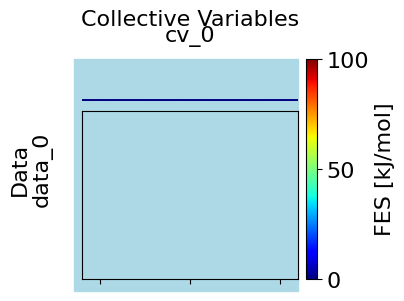

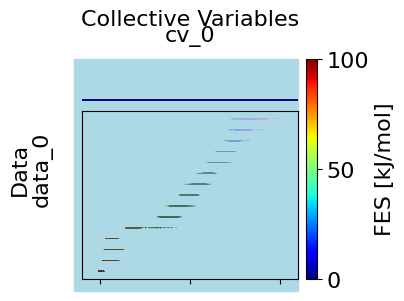

In [61]:
rounds.plot_round(    c=0,    r=1,dlo_kwargs=dict(only_finished=False,))

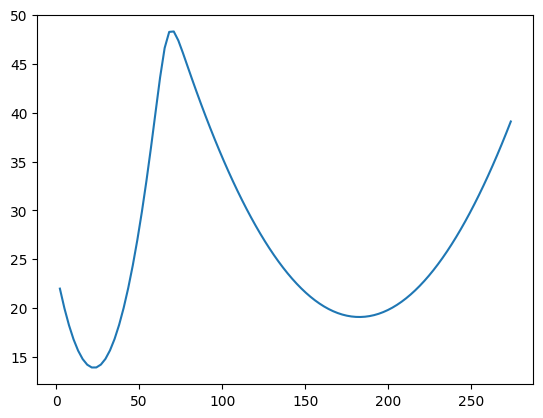

In [5]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from IMLCV.base.UnitsConstants import angstrom




r0 = 1.501 * angstrom


x = jnp.linspace(0.1 * ( r0) ** 3, 1.5 * (2 * r0) ** 3, 100)


def gauss(v,r,a=1.0):
    return   jnp.exp(-a*( (v-r**3)/(r**3))**2) *  (  jnp.sqrt(a) / (r**3))

def f(V):
    return -5.0 *jnp.log( gauss(V,r0,2) + gauss(V,2*r0,16))
    

plt.plot(x, f(x))

In [6]:
import jax.numpy as jnp

In [7]:
2*r0

5.672957854031599

sigma


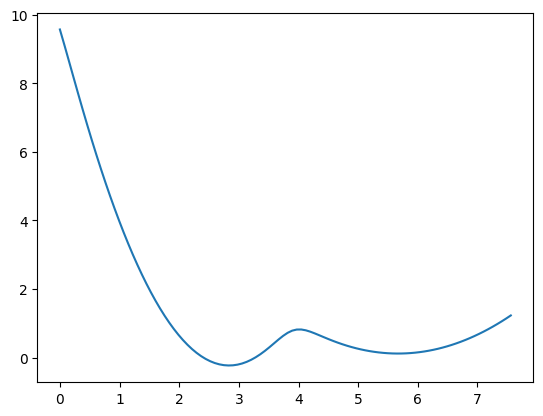

In [8]:
x = jnp.linspace(0, 4, 100)*angstrom

sigma = 2 ** (-1 / 6)

print(f"sigma")


r0 = 1.5 * angstrom

def f(r):
  
    def gauss(r,r0,a=1.0):
        return   jnp.exp(-a*( (r-r0)/(r0))**2) *  (  jnp.sqrt(a) / (r0))


    return -0.5 * jnp.log( gauss(r,r0,a=20.0) + gauss(r,2*r0,a=20.0)   )

  
    # r2 = jnp.sum(r**2)

    # r2_safe = jnp.where(r2 > 1e-7, r2, 1e-7)
    # return  4 * 4.0 * ((sigma**2 / r2_safe) ** 6 - (sigma**2 / r2_safe) ** 3)

plt.plot(x, jax.vmap(f)(x))

# plt.plot(x, jax.vmap(jax.grad(f))(x))

In [1]:
%load_ext autoreload

%autoreload 2

In [13]:
from IMLCV.examples.example_systems import toy_periodic_phase_trans
from pathlib import Path
md,refs = toy_periodic_phase_trans()


f = Path("perovskites")/"test.h5"
if f.exists():
    f.unlink()

md.trajectory_file=f
refs[0].volume()

Array(182.20503404, dtype=float64)

In [14]:
import jax



# with jax.check_tracer_leaks():

md.run(1000)

running for 1000 steps!
sampling NPT ensemble thermostat.name='Langevin' barostat.name='Langevin'
   step   | cons err | e_pot[Kj/mol] |e_bias[Kj/mol] |  P[bar]  |   T[K]   |walltime[s]||∇ₓUᵇ|[Kj/Å] |    CV    
       100|    0.0003|    27.16044118|     0.00000000    1620.67     276.12        5.71| [1083.97872544]
       200|    0.0003|    38.06467581|     0.00000000   -1056.80     317.00        5.87| [1106.91174489]
       300|    0.0004|    35.17771571|     0.00000000    1841.14     360.72        6.03| [1023.9599528]
       400|    0.0004|    46.88953752|     0.00000000     701.59     201.37        6.19| [945.77924866]
       500|    0.0003|    36.06472256|     0.00000000     274.67     231.11        6.34| [1098.67357524]
       600|    0.0003|    59.92820889|     0.00000000   -3864.06     272.02        6.49| [1205.86058928]
       700|    0.0003|    42.97393202|     0.00000000    2839.58     638.99        6.64| [991.41853309]
       800|    0.0002|    39.72788747|     0.00000000    

In [15]:
from ase.visualize import view
view(md.sp.canonicalize()[0].to_ase(md.static_trajectory_info).repeat(2), viewer='x3d')